<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4.2 Spectral Graph Bipartitioning

Graph partition aims to find a partition in a weighted gap such that the number of edges between disjoint sets of nodes (or "cut") is minimized.

Given V1 ∪ V2 = V, the cut an be defined as:

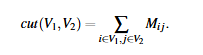

Spectral graph partitioning involves finding equaly sized vertex subset, such that

cut( V1* , V2* ) = minV1,V2 cut( V1 , V2 )

To do this we define a partition vector p that captures the division:

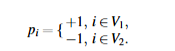

Using properties of Laplacian matrices, this can be expressed as:

For a graph G, L and W are it's Laplacian and vertex weight matrices. Let v1 = Wv1 and v2 = Wv2, then the serialized partition vector equals

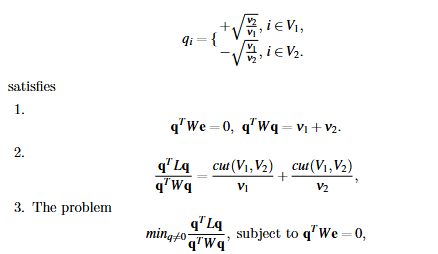

Laplacian Matrix: [[ 2 -1 -1  0  0]
 [-1  3 -1 -1  0]
 [-1 -1  3  0 -1]
 [ 0 -1  0  2 -1]
 [ 0  0 -1 -1  2]]

Eigenvalues of L matrix [4.44089210e-15 1.38196601e+00 2.38196601e+00 3.61803399e+00
 4.61803399e+00]

Eigenvectors of L matrix [[ 4.47213595e-01 -6.32455532e-01  0.00000000e+00  6.32455532e-01
   1.98537850e-16]
 [ 4.47213595e-01 -1.95439508e-01 -3.71748034e-01 -5.11667274e-01
   6.01500955e-01]
 [ 4.47213595e-01 -1.95439508e-01  3.71748034e-01 -5.11667274e-01
  -6.01500955e-01]
 [ 4.47213595e-01  5.11667274e-01 -6.01500955e-01  1.95439508e-01
  -3.71748034e-01]
 [ 4.47213595e-01  5.11667274e-01  6.01500955e-01  1.95439508e-01
   3.71748034e-01]]

Fielder Vector [-0.63245553 -0.19543951 -0.19543951  0.51166727  0.51166727]

Parition of Nodes {0: 0, 1: 0, 2: 0, 3: 1, 4: 1}


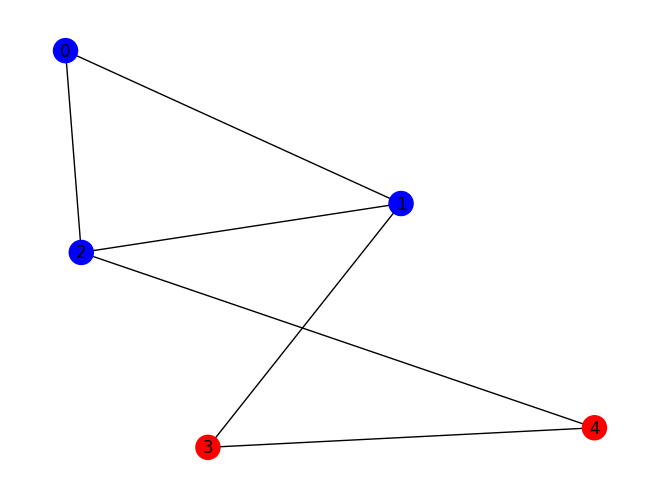

In [18]:
#spectral graph bipartitioning
import numpy as np
import networkx as nx
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh

#Creating a graph
#edges are defined as (i,j,w_ij)
#where i and j are nodes and w_ij is the weight of edge
G = nx.Graph()
edges = [
    (0,1,1),
    (0,2,1),
    (1,2,1),
    (1,3,1),
    (2,4,1),
    (3,4,1)
]
#adding edges to graph
G.add_weighted_edges_from(edges)

#Computing laplacian matrix
L = laplacian(nx.adjacency_matrix(G), normed = False).toarray()
print("Laplacian Matrix:", L)

#computing eigenvalues and eivenvectors of laplacian matrix
e_vals, e_vec = eigh(L)

#sorting eigenvalues in increasing order
sort = np.argsort(e_vals)
e_vals = e_vals[sort]
e_vec = e_vec[:, sort]
print("\nEigenvalues of L matrix", e_vals)
print("\nEigenvectors of L matrix", e_vec)

#find fielder vector (q2)
#corresponds to second smallest eigenvalue
#split the graph into two partitions around this vector
q2 = e_vec[:, 1]
print("\nFielder Vector" , q2)

#parition graph around q2
#Nodes where q2[i] > 0 are in V1
#Nodes where q2[i] <= 0 are in V2
partition = {}
color = {}
for i in range(len(q2)):
  if (q2[i] > 0):
    partition[i] = 1;
  else:
    partition[i] = 0;

print("\nParition of Nodes", partition)

#Assigning colors to each individual node for visualization
#Red belongs to V1 and blue belongs to V2
color = []
for i in G.nodes():
  if partition[i] == 1:
    color.append('red')
  else:
    color.append('blue')

nx.draw(
    G,
    with_labels = True,
    node_color = color,
)